In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_test_filtered.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Columns: 274 entries, yellow sputum to conflicting_diseases
dtypes: int64(271), object(3)
memory usage: 466.8+ KB
None


# Visualize Data Distribution

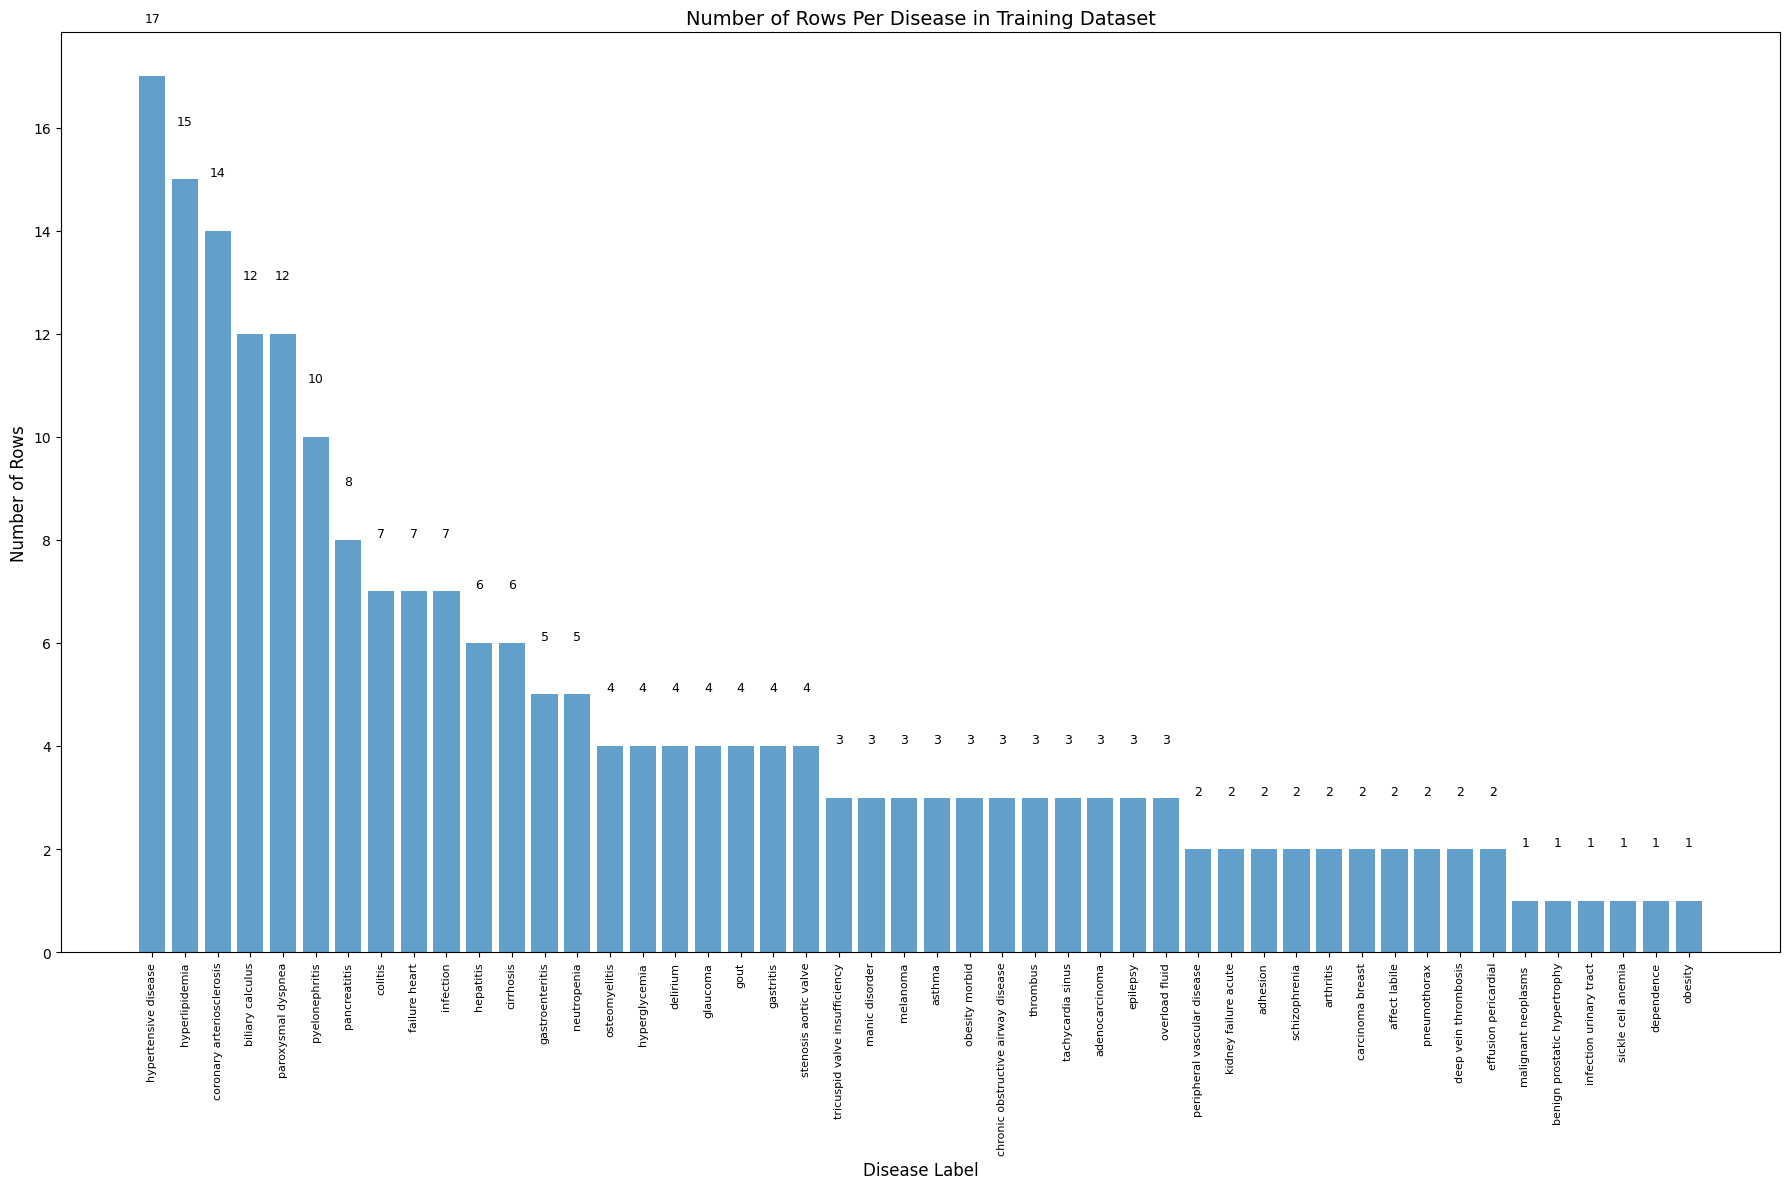

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_train_filtered.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_val_filtered.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML_o_test_filtered.csv")

# Separate features and target
X_train, y_train = train_data.iloc[:, :-3], train_data["disease_label"]
X_valid, y_valid = valid_data.iloc[:, :-3], valid_data["disease_label"]
X_test, y_test = test_data.iloc[:, :-3], test_data["disease_label"]

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the Model
y_valid_pred = rf_model.predict(X_valid)
val_report = classification_report(y_valid, y_valid_pred)
print("Validation Report:")
print(val_report)

# Test the Model
y_test_pred = rf_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print("Test Report:")
print(test_report)


Validation Report:
                                    precision    recall  f1-score   support

                    adenocarcinoma       0.00      0.00      0.00         1
                          adhesion       0.00      0.00      0.00         1
                     affect labile       0.00      0.00      0.00         1
                         arthritis       0.00      0.00      0.00         2
                            asthma       0.00      0.00      0.00         0
      benign prostatic hypertrophy       0.00      0.00      0.00         1
                  biliary calculus       0.43      0.55      0.48        11
                  carcinoma breast       0.50      0.50      0.50         2
chronic obstructive airway disease       0.29      0.33      0.31         6
                         cirrhosis       0.50      0.50      0.50         2
                           colitis       0.50      0.20      0.29        10
         coronary arteriosclerosis       0.33      0.38      0.36   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False).head(10))  # Top 10 important features

shortness of breath    0.034861
pain                   0.031681
sore to touch          0.029302
nausea                 0.028403
pain chest             0.027967
pain abdominal         0.027794
orthopnea              0.026907
apyrexial              0.026324
angina pectoris        0.026101
vomiting               0.025975
dtype: float64


# Saved the predicted out in csv

In [ ]:
"""
import pandas as pd

# Combine the real labels, predicted labels, and optionally the testing features
results = pd.DataFrame({
    "Real Label": y_test.values,
    "Predicted Label": y_pred
})

# Optionally, include testing features for context
testing_features = X_test.reset_index(drop=True)  # Reset index to align with predictions
results_with_features = pd.concat([testing_features, results], axis=1)

# Save results to a CSV file
results_with_features.to_csv("/content/drive/MyDrive/P2/Dataset/DiseasePrediction2/RFpredicted_output.csv", index=False)

print("Predicted output saved to 'predicted_output.csv'")
"""

'\nimport pandas as pd\n\n# Combine the real labels, predicted labels, and optionally the testing features\nresults = pd.DataFrame({\n    "Real Label": y_test.values,\n    "Predicted Label": y_pred\n})\n\n# Optionally, include testing features for context\ntesting_features = X_test.reset_index(drop=True)  # Reset index to align with predictions\nresults_with_features = pd.concat([testing_features, results], axis=1)\n\n# Save results to a CSV file\nresults_with_features.to_csv("/content/drive/MyDrive/P2/Dataset/DiseasePrediction2/RFpredicted_output.csv", index=False)\n\nprint("Predicted output saved to \'predicted_output.csv\'")\n'

# Generate Classification Report

In [ ]:

import pandas as pd
from sklearn.metrics import classification_report

# Assuming rf_model is your trained model, and X_test, y_test are defined
y_pred = rf_model.predict(X_test)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert the dictionary to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the classification report as a CSV file
report_df.to_csv("/content/drive/MyDrive/P2/T1/Dataset/overlapped/ML/RF-no-class.csv", index=True)

print("Classification report saved.")


Classification report saved.
